In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import math
import random

In [2]:
daily_barrick = pd.read_csv("Daily_BARRICK_01-12-2014_01-12-2024.csv")
daily_newmont = pd.read_csv("Daily_NEWMONT_01-12-2014_01-12-2024.csv")
daily_chevron = pd.read_csv("Daily_CHEVRON_01-12-2014_01-12-2024.csv")
daily_exxon = pd.read_csv("Daily_EXXON_01-12-2014_01-12-2024.csv")

daily_barrick = daily_barrick.drop("Vol.", axis=1)
daily_newmont = daily_newmont.drop("Vol.", axis=1)
daily_chevron = daily_chevron.drop("Vol.", axis=1)
daily_exxon = daily_exxon.drop("Vol.", axis=1)

In [3]:
daily_barrick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2517 non-null   object 
 1   Price     2517 non-null   float64
 2   Open      2517 non-null   float64
 3   High      2517 non-null   float64
 4   Low       2517 non-null   float64
 5   Change %  2517 non-null   object 
dtypes: float64(4), object(2)
memory usage: 118.1+ KB


In [4]:
daily_barrick.iloc[:, 1:] = daily_barrick.iloc[:, 1:].replace({',': '', '%': ''}, regex=True).astype(float)
daily_newmont.iloc[:, 1:] = daily_newmont.iloc[:, 1:].replace({',': '', '%': ''}, regex=True).astype(float)
daily_chevron.iloc[:, 1:] = daily_chevron.iloc[:, 1:].replace({',': '', '%': ''}, regex=True).astype(float)
daily_exxon.iloc[:, 1:] = daily_exxon.iloc[:, 1:].replace({',': '', '%': ''}, regex=True).astype(float)

daily_barrick.iloc[:, -1] *= 0.01
daily_newmont.iloc[:, -1] *= 0.01
daily_chevron.iloc[:, -1] *= 0.01
daily_exxon.iloc[:, -1] *= 0.01

daily_barrick['Date'] = pd.to_datetime(daily_barrick['Date'], format='%m/%d/%Y', errors='coerce')
daily_newmont['Date'] = pd.to_datetime(daily_newmont['Date'], format='%m/%d/%Y', errors='coerce')
daily_chevron['Date'] = pd.to_datetime(daily_chevron['Date'], format='%m/%d/%Y', errors='coerce')
daily_exxon['Date'] = pd.to_datetime(daily_exxon['Date'], format='%m/%d/%Y', errors='coerce')

daily_barrick.set_index('Date', inplace=True)
daily_newmont.set_index('Date', inplace=True)
daily_chevron.set_index('Date', inplace=True)
daily_exxon.set_index('Date', inplace=True)

C:\Users\vidya\AppData\Local\Temp\ipykernel_79360\3117398913.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  daily_barrick.iloc[:, 1:] = daily_barrick.iloc[:, 1:].replace({',': '', '%': ''}, regex=True).astype(float)
C:\Users\vidya\AppData\Local\Temp\ipykernel_79360\3117398913.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  daily_newmont.iloc[:, 1:] = daily_newmont.iloc[:, 1:].replace({',': '', '%': ''}, regex=True).astype(float)
C:\Users\vidya\AppData\Local\Temp\ipykernel_79360\3117398913.py:3: DeprecationWarning: In a future versi

In [5]:
daily_barrick.head()

,Price,Open,High,Low,Change %
Date,,,,,
2024-01-11,17.15,17.38,17.49,16.94,-0.0110
2024-01-10,17.34,17.44,17.52,17.20,-0.0034
2024-01-09,17.40,17.69,17.70,17.37,-0.0164
2024-01-08,17.69,17.39,17.92,17.31,0.0114
2024-01-05,17.49,17.44,17.72,17.26,0.0081


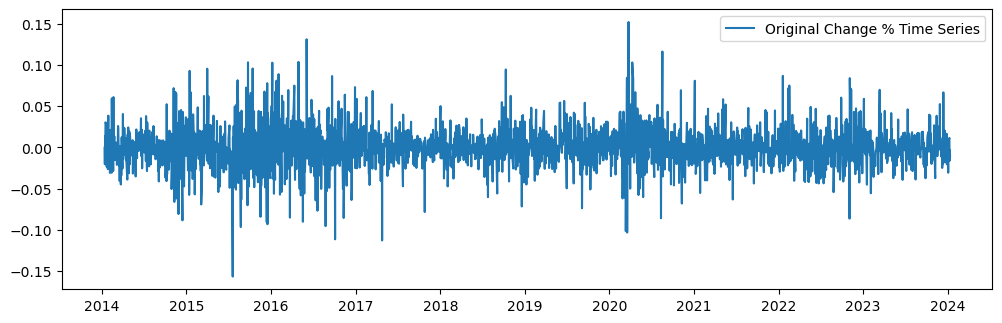

In [6]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(daily_barrick.index, daily_barrick['Change %'], label='Original Change % Time Series')
plt.legend()

In [7]:
result_daily_barrick = seasonal_decompose(daily_barrick['Change %'], model='additive', period=365)

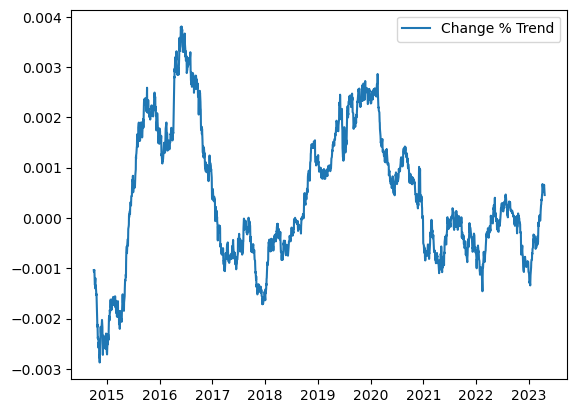

In [8]:
plt.subplot(1, 1, 1)
plt.plot(daily_barrick.index, result_daily_barrick.trend, label='Change % Trend')
plt.legend()

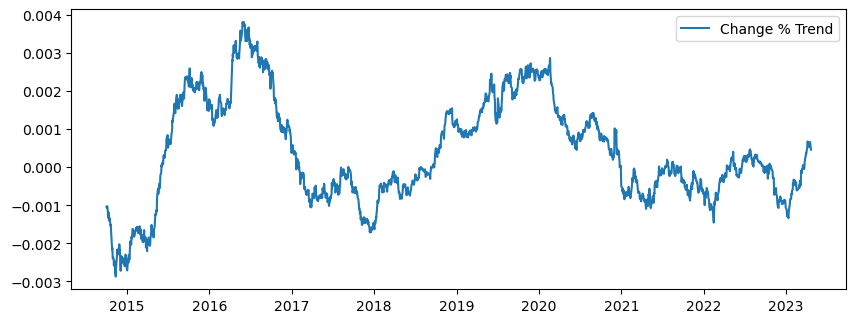

In [9]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 2)
plt.plot(daily_barrick.index, result_daily_barrick.trend, label='Change % Trend')
plt.legend()

In [10]:
barrick_volatility = daily_barrick['Change %'].std()

# Annual volatility (assume 252 trading days)
annbarrick_volatility = barrick_volatility * np.sqrt(252)

print(f"Daily Volatility for barrick: {barrick_volatility:.4f}")
print(f"Annualized Volatility for barrick: {annbarrick_volatility:.4f}")

Daily Volatility for barrick: 0.0251
Annualized Volatility for barrick: 0.3989


<Axes: title={'center': '30-Day Rolling Volatility for barrick'}, xlabel='Date'>

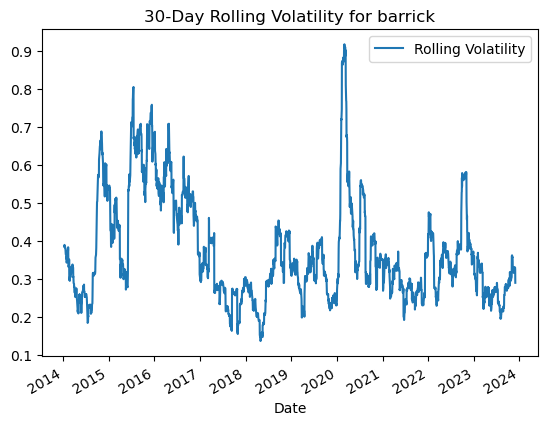

In [11]:
# Rolling Window
daily_barrick['Rolling Volatility'] = daily_barrick['Change %'].rolling(window=30).std() * np.sqrt(252)
# Plot
daily_barrick[['Rolling Volatility']].plot(title=f'30-Day Rolling Volatility for barrick')


In [12]:
data1 = daily_barrick
data2 = daily_newmont
data3 = daily_exxon
data4 = daily_chevron
data3.describe()

,Price,Open,High,Low,Change %
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,80.432030,80.428673,81.164410,79.680858,0.000145
std,18.653264,18.628989,18.717932,18.552834,0.017474
min,31.450000,31.410000,32.380000,30.110000,-0.122200
25%,71.750000,71.770000,72.300000,71.040000,-0.008300
50%,82.050000,82.090000,82.580000,81.510000,0.000000
75%,91.530000,91.630000,92.360000,90.640000,0.008400
max,120.200000,119.980000,120.700000,118.190000,0.126900


In [20]:
data1.describe()

,Price,Open,High,Low,Change %,Rolling Volatility,Log Return
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000
mean,16.740414,16.753465,16.995382,16.492649,0.000301,0.373742,0.000011
std,4.614385,4.623967,4.669500,4.550100,0.025199,0.139635,0.025192
min,5.910000,6.050000,6.190000,5.880000,-0.156800,0.136966,-0.141594
25%,13.330000,13.297500,13.517500,13.130000,-0.012825,0.273263,-0.012704
50%,16.725000,16.710000,16.940000,16.500000,0.000000,0.332977,0.000000
75%,19.292500,19.330000,19.580000,18.990000,0.012800,0.443593,0.012987
max,29.940000,30.670000,30.690000,29.460000,0.152100,0.917479,0.170492


In [13]:
data1['Log Return'] = np.log(data1['Price'] / data1['Price'].shift(1))
data2['Log Return'] = np.log(data2['Price'] / data2['Price'].shift(1))
data3['Log Return'] = np.log(data3['Price'] / data3['Price'].shift(1))
data4['Log Return'] = np.log(data4['Price'] / data4['Price'].shift(1))

data1 = data1.dropna()
data2 = data2.dropna()
data3 = data3.dropna()
data4 = data4.dropna()

daily_volatility_log = data1['Log Return'].std()
daily_volatility_log2 = data2['Log Return'].std()
daily_volatility_log3 = data3['Log Return'].std()
daily_volatility_log4 = data4['Log Return'].std()

annualized_volatility_log = daily_volatility_log * np.sqrt(252)
annualized_volatility_log2 = daily_volatility_log2 * np.sqrt(252)
annualized_volatility_log3 = daily_volatility_log3 * np.sqrt(252)
annualized_volatility_log4 = daily_volatility_log4 * np.sqrt(252)

In [14]:
print(f"Daily Logarithmic Volatility for Barrick: {daily_volatility_log:.4f}")
print(f"Annualized Logarithmic Volatility for Barrick: {annualized_volatility_log:.4f}")

print(f"Daily Logarithmic Volatility for Newmont: {daily_volatility_log2:.4f}")
print(f"Annualized Logarithmic Volatility for Newmont: {annualized_volatility_log2:.4f}")

print(f"Daily Logarithmic Volatility for Exxon: {daily_volatility_log3:.4f}")
print(f"Annualized Logarithmic Volatility for Exxon: {annualized_volatility_log3:.4f}")

print(f"Daily Logarithmic Volatility for Chevron: {daily_volatility_log4:.4f}")
print(f"Annualized Logarithmic Volatility for Chevron: {annualized_volatility_log4:.4f}")

Daily Logarithmic Volatility for Barrick: 0.0252
Annualized Logarithmic Volatility for Barrick: 0.3999
Daily Logarithmic Volatility for Newmont: 0.0228
Annualized Logarithmic Volatility for Newmont: 0.3621
Daily Logarithmic Volatility for Exxon: 0.0175
Annualized Logarithmic Volatility for Exxon: 0.2775
Daily Logarithmic Volatility for Chevron: 0.0187
Annualized Logarithmic Volatility for Chevron: 0.2976


C:\Users\vidya\AppData\Local\Temp\ipykernel_79360\2933594058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(subset=['Log Return'], inplace=True)


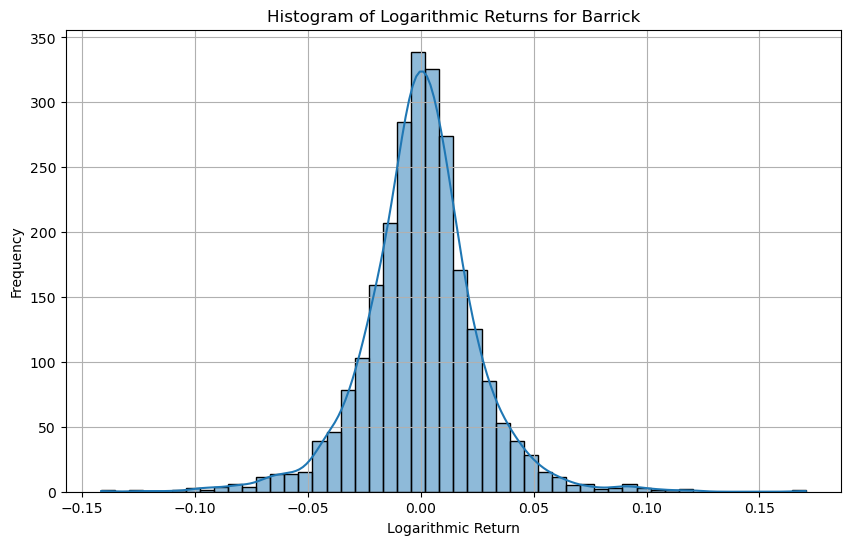

In [15]:
data1.dropna(subset=['Log Return'], inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data1['Log Return'], bins=50, kde=True)
plt.title(f'Histogram of Logarithmic Returns for Barrick')
plt.xlabel('Logarithmic Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\vidya\AppData\Local\Temp\ipykernel_79360\1246726527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(subset=['Log Return'], inplace=True)


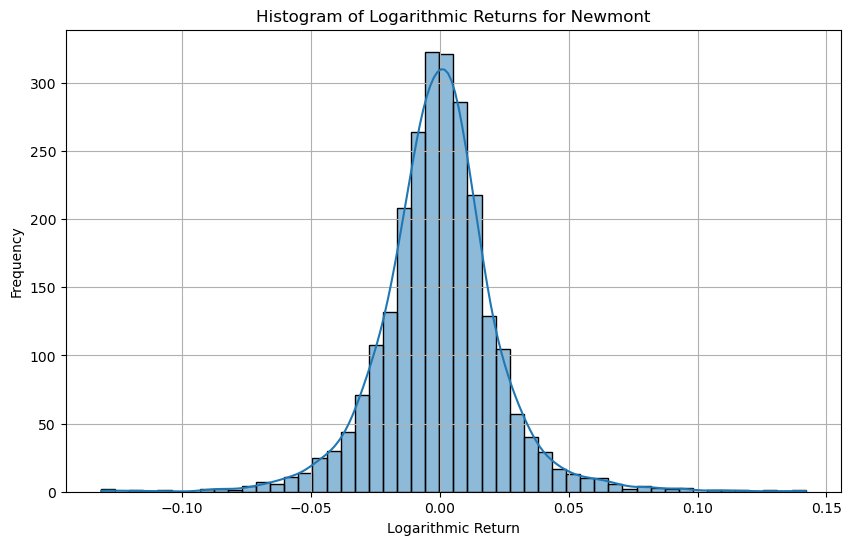

In [16]:
data2.dropna(subset=['Log Return'], inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data2['Log Return'], bins=50, kde=True)
plt.title(f'Histogram of Logarithmic Returns for Newmont')
plt.xlabel('Logarithmic Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\vidya\AppData\Local\Temp\ipykernel_79360\3417352262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.dropna(subset=['Log Return'], inplace=True)


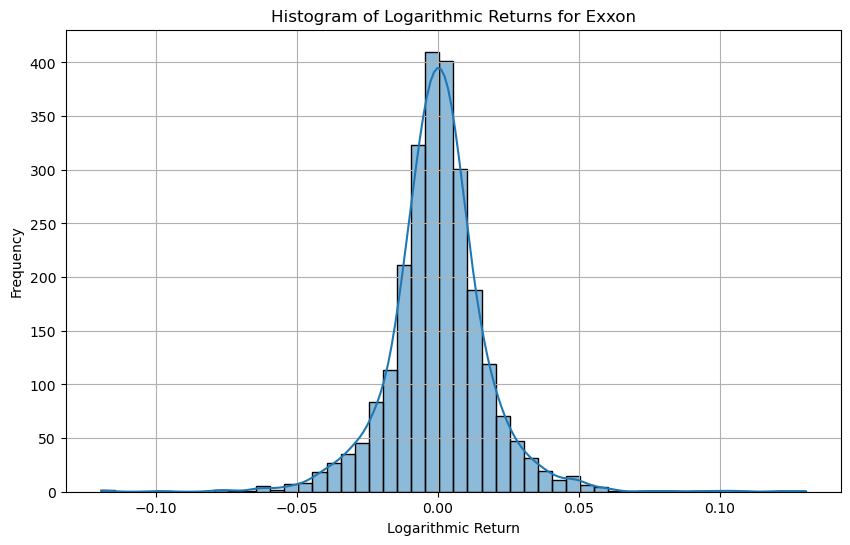

In [17]:
data3.dropna(subset=['Log Return'], inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data3['Log Return'], bins=50, kde=True)
plt.title(f'Histogram of Logarithmic Returns for Exxon')
plt.xlabel('Logarithmic Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\vidya\AppData\Local\Temp\ipykernel_79360\4184980153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.dropna(subset=['Log Return'], inplace=True)


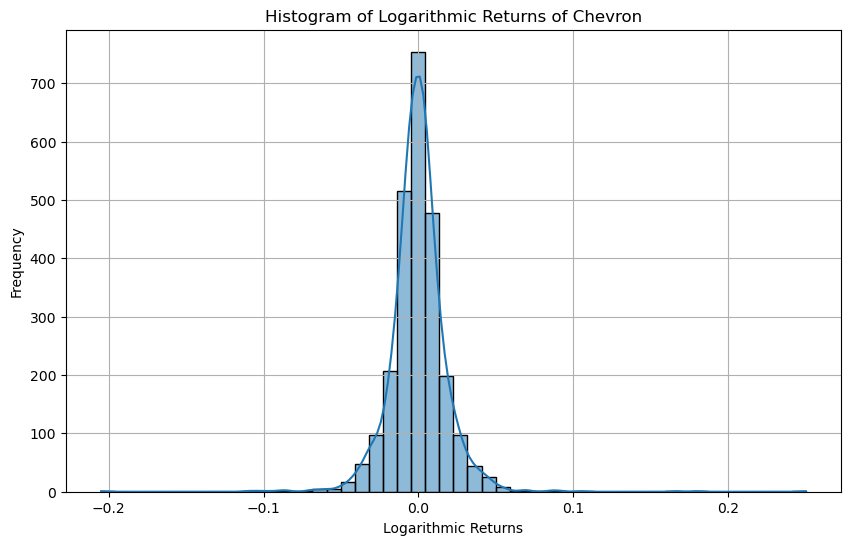

In [19]:
data4.dropna(subset=['Log Return'], inplace=True)

plt.figure(figsize=(10,6))
sns.histplot(data4['Log Return'], bins=50, kde=True)
plt.title(f'Histogram of Logarithmic Returns of Chevron')
plt.xlabel('Logarithmic Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()